#### A類不確定度

##### 抽撲克牌

In [1]:
import random
# number of sample
num_samples = 10

# Generate a random integer
random_int = random.randint(1, 13)
print("Random Integer:", random_int)

# Generate a list of random integers 
poker_list = [random.randint(1, 13) for _ in range(num_samples)]
print("抽牌:", poker_list)

# Get the mean of the list
result = sum(poker_list) / len(poker_list)
print("平均:", result)
print(f"誤差:{result-7:.1f}" )


Random Integer: 2
抽牌: [1, 6, 9, 7, 7, 1, 2, 12, 9, 9]
平均: 6.3
誤差:-0.7


##### 抽好多次畫統計圖

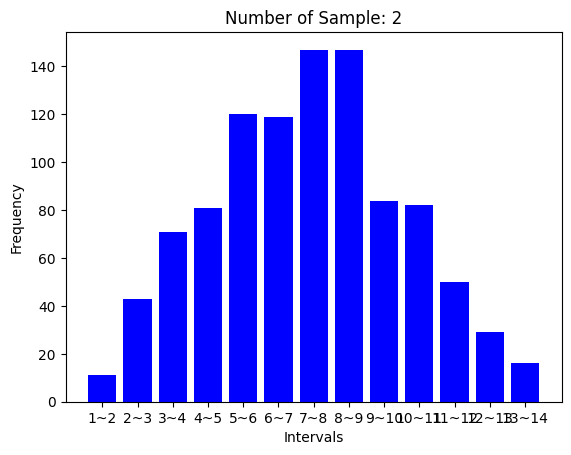

[7.5, 5.0, 9.0, 6.5, 8.0, 7.0, 9.5, 10.0, 8.5, 10.5, 9.0, 5.5, 6.0, 6.0, 7.0, 1.0, 7.0, 10.5, 5.5, 8.0, 7.5, 7.5, 6.0, 5.0, 10.5, 8.0, 11.0, 7.0, 5.5, 3.0, 1.5, 9.0, 8.0, 12.0, 8.0, 10.5, 4.0, 4.5, 11.5, 6.5, 6.0, 6.5, 2.5, 7.5, 7.5, 1.5, 5.5, 9.5, 8.5, 11.5, 7.0, 11.0, 12.5, 9.5, 8.5, 6.5, 4.5, 3.0, 8.0, 11.0, 7.5, 5.0, 7.5, 11.5, 10.0, 13.0, 5.5, 5.5, 3.0, 6.5, 8.0, 10.5, 6.5, 8.0, 8.5, 3.0, 7.0, 8.0, 9.5, 8.0, 10.5, 2.0, 5.5, 8.0, 10.5, 6.5, 2.0, 8.0, 6.0, 9.5, 8.0, 10.5, 8.5, 6.0, 5.0, 9.0, 4.5, 7.5, 8.0, 12.5, 5.0, 4.0, 10.5, 6.5, 8.0, 8.5, 3.5, 10.0, 1.0, 8.0, 7.0, 9.5, 8.5, 8.5, 6.0, 8.0, 7.0, 7.0, 4.0, 7.5, 3.0, 5.0, 7.5, 6.0, 3.5, 10.5, 5.5, 3.0, 4.5, 7.0, 7.0, 7.5, 3.5, 7.0, 11.5, 7.5, 4.0, 4.5, 5.5, 8.5, 10.5, 9.0, 11.0, 9.0, 9.0, 4.0, 8.0, 6.5, 3.5, 3.5, 6.0, 8.0, 8.5, 7.0, 5.5, 3.5, 8.5, 9.0, 8.0, 8.0, 8.5, 6.5, 6.0, 7.5, 5.0, 10.0, 13.0, 6.5, 5.5, 12.0, 7.0, 4.5, 6.5, 4.0, 4.0, 11.5, 4.0, 9.5, 1.0, 4.5, 4.0, 4.5, 9.0, 11.5, 3.5, 4.5, 13.0, 10.5, 8.5, 6.5, 6.0, 5.0, 7.0, 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# number of sample
num_samples = 2

# Poker Mean List
poker_mean_list = []
for i in range(1000):
    # Generate a list of random integers 
    poker_list = [random.randint(1, 13) for _ in range(num_samples)]
    
    # Get the mean of the list
    mean = sum(poker_list) / len(poker_list)
    
    # Append the mean to the list
    poker_mean_list.append(mean)

# Given list of numbers
data = poker_mean_list

# Define the intervals
intervals = np.arange(1, 14, 1)  # This represents [1~2, 2~3, 3~4]

# Count the occurrences of each number within intervals
histogram_data = [sum(1 for num in data if interval <= num < interval + 1) for interval in intervals]

# Define the labels for x-axis
interval_labels = [f"{interval}~{interval+1}" for interval in intervals]

# Create the histogram plot
plt.bar(interval_labels, histogram_data, color='blue')

# Add labels and title
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.title(f'Number of Sample: {num_samples}')

# save the plot
plt.savefig(f'a_sample_{num_samples}.png')

# Show the plot
plt.show()
print(poker_mean_list)

##### 不確定度有用嗎？

In [ ]:
from playsound import playsound

# Generate a list of random integers 
num_samples = 100
poker_list = [random.randint(1, 13) for _ in range(num_samples)]
mean = sum(poker_list) / len(poker_list)
standard_deviation = np.std(poker_list, ddof=1)
a_uncertainty = standard_deviation / np.sqrt(num_samples)
print(poker_list)
print(f'平均值: {mean}')
print(f'A類不確定度: {a_uncertainty:.1f}')
print(f'真值範圍: {mean-a_uncertainty:.1f}~{mean+a_uncertainty:.1f}')
if(7>mean-a_uncertainty and 7<mean+a_uncertainty):
    print('對了！')
else:
    print('錯了...')

[10, 11, 11, 11, 8, 3, 9, 8, 8, 10, 6, 1, 5, 9, 5, 9, 13, 9, 9, 3, 9, 11, 1, 4, 11, 2, 4, 13, 6, 4, 1, 4, 6, 8, 12, 2, 4, 2, 2, 13, 7, 12, 11, 5, 9, 1, 12, 9, 10, 9, 2, 11, 10, 11, 12, 8, 11, 12, 12, 11, 8, 7, 10, 11, 5, 2, 11, 5, 10, 13, 2, 11, 13, 11, 9, 4, 1, 6, 11, 9, 3, 4, 11, 3, 10, 6, 6, 4, 7, 6, 9, 6, 5, 5, 3, 6, 2, 2, 13, 7]
平均值: 7.39
A類不確定度: 0.4
真值範圍: 7.0~7.8
錯了...


##### 不確定度有用嗎？統計正確率

In [ ]:
import random
import numpy as np

# number of experiment
exp_num = 1000
# number of sample
num_samples = 100
# times of uncertainty
times_unc = 2
# error counter
error_counter = 0
# real value
real_value = 7
for _ in range(exp_num):
    poker_list = [random.randint(1, 13) for _ in range(num_samples)]
    mean = sum(poker_list) / len(poker_list)
    standard_deviation = np.std(poker_list, ddof=1)
    a_uncertainty = standard_deviation / np.sqrt(num_samples)
    if(real_value<mean-times_unc*a_uncertainty or real_value>mean+times_unc*a_uncertainty):
        error_counter+=1
print(f"正確率: {100-error_counter/exp_num*100:.2f}%")



正確率: 95.20%
